In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
stockdata=pd.read_csv('reliance_data.csv')

In [4]:
stockdata.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [5]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6205 non-null   object 
 1   Symbol              6205 non-null   object 
 2   Series              6205 non-null   object 
 3   Prev Close          6205 non-null   float64
 4   Open                6205 non-null   float64
 5   High                6205 non-null   float64
 6   Low                 6205 non-null   float64
 7   Last                5657 non-null   float64
 8   Close               6205 non-null   float64
 9   VWAP                6205 non-null   float64
 10  Volume              6205 non-null   int64  
 11  Turnover            6205 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable Volume  4693 non-null   float64
 14  %Deliverble         4693 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 727.3

In [6]:
#Checking the Highest and Lowest Trade
print("Highest Trade Price - "+str(max(stockdata["Close"])))
print("Lowest Trade Price - "+str(min(stockdata["Close"])))

Highest Trade Price - 3220.85
Lowest Trade Price - 101.3


In [7]:
#Splitting the dataset
x=stockdata.iloc[:,3:5].values
y=stockdata.iloc[:,8:9].values

In [8]:
#random_state is the seed used by the random number generator, it can be any integer.
#Splitting the data in to Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,test_size = 0.3, random_state=0)

In [9]:
#importing the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [10]:
#fitting the model
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [11]:
cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

array([-468.28028425, -661.41418242, -690.33038327, -526.97260423,
       -398.90306889, -533.96851232, -652.57748432, -913.93241372,
       -529.01630865, -691.58636084])

In [18]:
#Calculating the negative Mean Squared Error Using Cross Validation technique
mse=cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [19]:
np.mean(mse)

-606.6981602907327

In [20]:
#building a ols model to check the correlation
import statsmodels.api as sm         
X_train = sm.add_constant(X_train)   
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.276e+06
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:08:33   Log-Likelihood:                -20005.
No. Observations:                4343   AIC:                         4.002e+04
Df Residuals:                    4340   BIC:                         4.004e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1128      0.654      3.228      0.0

In [24]:
#prediction
reg_pred=reg.predict(X_test)

In [25]:
reg_pred

array([[ 259.24136519],
       [ 837.20204323],
       [2069.6925023 ],
       ...,
       [ 719.45645781],
       [ 861.35249908],
       [2334.06976644]])

In [27]:
#comparing the actual values with the predicted values
stock_diff = pd.DataFrame({'Actual value':y_test.tolist(), 'Predicted value': reg_pred.tolist()})
stock_diff.head(10)

,Actual value,Predicted value
0,[254.05],[259.2413651853076]
1,[844.75],[837.2020432264854]
2,[1993.25],[2069.692502296693]
3,[333.6],[337.2566166231292]
4,[788.4],[793.6281246535359]
5,[716.8],[714.9925275651955]
6,[167.2],[166.6902803727672]
7,[746.75],[740.0025107687934]
8,[1058.4],[1056.3805539534533]
9,[984.35],[977.4674038183543]


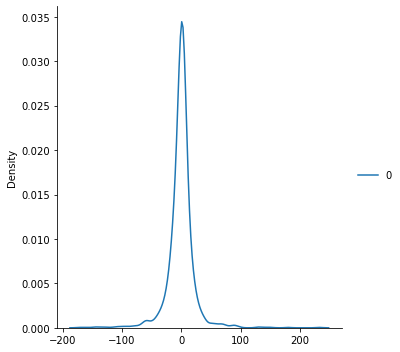

In [28]:
#comparing the actual values with the predicted values in visulazation
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [33]:
#Calculating mean Square and absolute mean square error
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, reg_pred)
meanSqErr = metrics.mean_squared_error(y_test, reg_pred)
print('R squared: {:.2f}'.format(reg.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 99.83
Mean Absolute Error: 13.116457980301512
Mean Square Error: 551.4761656530053


In [34]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(reg_pred,y_test)

In [36]:
score

0.9984067549155271

So Our Predicted Model Getting a Score Or Accuaracy of 99%